<h1> Networkx - Chinese Postman Problem  </h1>

In [62]:
# import libraries
import networkx as nx
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools

In [63]:
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv') 


In [64]:
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [65]:
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [66]:
nodelist.head(10)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771
5,b_gy2,2000,983
6,b_o,2039,1012
7,b_rc,1311,979
8,b_rd,268,1744
9,b_rd_dupe,268,1744


In [67]:
graph = nx.Graph()

In [68]:
for idx, row in edgelist.iterrows():
    graph.add_edge(row[0], row[1], **row[2:].to_dict())

In [69]:
list(graph.edges(data=True))[:10]

[('rs_end_north',
  'v_rs',
  {'color': 'red', 'distance': 0.3, 'estimate': 0, 'trail': 'rs'}),
 ('v_rs',
  'b_rs',
  {'color': 'red', 'distance': 0.21, 'estimate': 0, 'trail': 'rs'}),
 ('v_rs',
  'v_bv',
  {'color': 'violet', 'distance': 0.52, 'estimate': 0, 'trail': 'v'}),
 ('v_rs',
  'v_end_east',
  {'color': 'violet', 'distance': 0.54, 'estimate': 0, 'trail': 'v'}),
 ('b_rs',
  'g_rs',
  {'color': 'red', 'distance': 0.11, 'estimate': 0, 'trail': 'rs'}),
 ('b_rs',
  'b_bv',
  {'color': 'blue', 'distance': 0.43, 'estimate': 0, 'trail': 'b'}),
 ('b_rs',
  'b_g',
  {'color': 'blue', 'distance': 0.07, 'estimate': 0, 'trail': 'b'}),
 ('g_rs',
  'w_rs',
  {'color': 'red', 'distance': 0.18, 'estimate': 0, 'trail': 'rs'}),
 ('g_rs',
  'g_rc',
  {'color': 'green', 'distance': 0.45, 'estimate': 0, 'trail': 'g'}),
 ('g_rs',
  'b_g',
  {'color': 'green', 'distance': 0.05, 'estimate': 1, 'trail': 'g'})]

In [70]:
for idx, row in nodelist.iterrows():
    nx.set_node_attributes(graph, {row[0] : row[1:].to_dict()})

In [71]:
np.array(graph.nodes(data=True))[:10]

array([['rs_end_north', {'X': 1772, 'Y': 172}],
       ['v_rs', {'X': 1793, 'Y': 484}],
       ['b_rs', {'X': 1747, 'Y': 700}],
       ['g_rs', {'X': 1676, 'Y': 775}],
       ['w_rs', {'X': 1646, 'Y': 947}],
       ['o_rs', {'X': 1724, 'Y': 1148}],
       ['y_rs', {'X': 1805, 'Y': 1246}],
       ['rs_end_south', {'X': 1865, 'Y': 1598}],
       ['rc_end_north', {'X': 867, 'Y': 618}],
       ['v_rc', {'X': 1288, 'Y': 934}]], dtype=object)

In [72]:
print('# of edges: {}'.format(graph.number_of_edges()))
print('# of nodes: {}'.format(graph.number_of_nodes()))

# of edges: 123
# of nodes: 77


In [73]:
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in graph.nodes(data=True)}

In [74]:
edge_colors = [e[2]['color'] for e in list(graph.edges(data=True))]

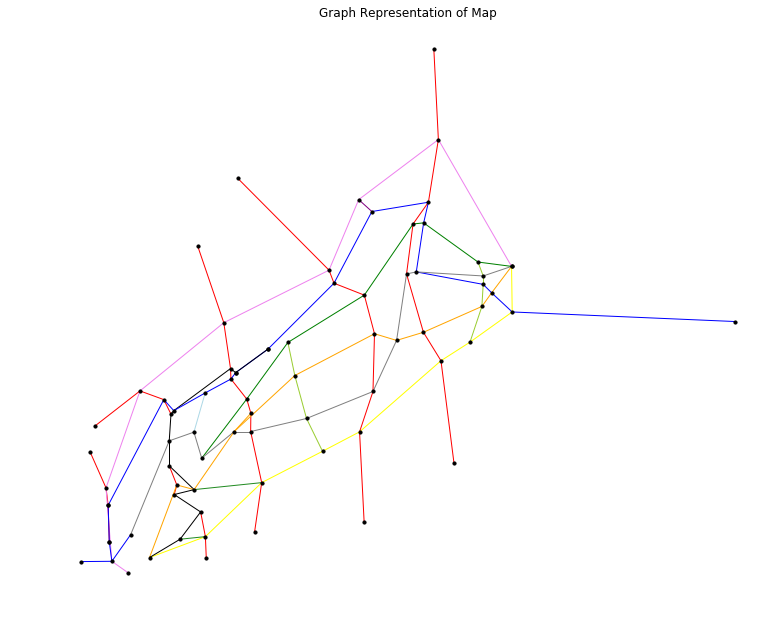

In [75]:
plt.figure(figsize=(10,8))
nx.draw(graph, pos=node_positions, edge_color=edge_colors, node_size=10, node_color="black")
plt.title("Graph Representation of Map")
plt.show()

Get all the nodes with odd number of edges

For a fully connected graph, there will always be even number of nodes with odd degree 

In [194]:
odd_degree_nodes = [node for node, degree in dict(nx.degree(graph)).items() if degree%2 == 1]

In [195]:
len(odd_degree_nodes)

36

In [196]:
odd_degree_pairs = itertools.combinations(odd_degree_nodes, 2)

In [197]:
def get_shortest_distance(graph, pairs, edge_weight_name):
    return {pair : nx.dijkstra_path_length(graph, pair[0], pair[1], edge_weight_name) for pair in pairs}

In [198]:
odd_nodes_pairs_shortest_path = get_shortest_distance(graph, odd_degree_pairs, "distance")

In [201]:
def create_graph(node_pairs_with_weights, flip_weight = True):
    graph = nx.Graph()
    
    for k,v in node_pairs_with_weights.items():
        wt = -v if flip_weight else v
        graph.add_edge(k[0], k[1], **{'distance': v, 'weight': wt})
    return graph


In [202]:
graph_complete_odd = create_graph(odd_nodes_pairs_shortest_path, flip_weight=True)

# Counts
print('Number of nodes: {}'.format(len(graph_complete_odd.nodes())))
print('Number of edges: {}'.format(len(graph_complete_odd.edges())))

Number of nodes: 36
Number of edges: 630


In [203]:
np.array(list(graph_complete_odd.edges(data=True)))

array([['rs_end_north', 'rs_end_south',
        {'distance': 1.52, 'weight': -1.52}],
       ['rs_end_north', 'rc_end_north',
        {'distance': 1.79, 'weight': -1.79}],
       ['rs_end_north', 'rc_end_south',
        {'distance': 1.79, 'weight': -1.79}],
       ...,
       ['y_gy1', 'y_gy2', {'distance': 0.87, 'weight': -0.87}],
       ['y_gy1', 'nature_end_west', {'distance': 0.74, 'weight': -0.74}],
       ['y_gy2', 'nature_end_west',
        {'distance': 1.6100000000000003, 'weight': -1.6100000000000003}]],
      dtype=object)

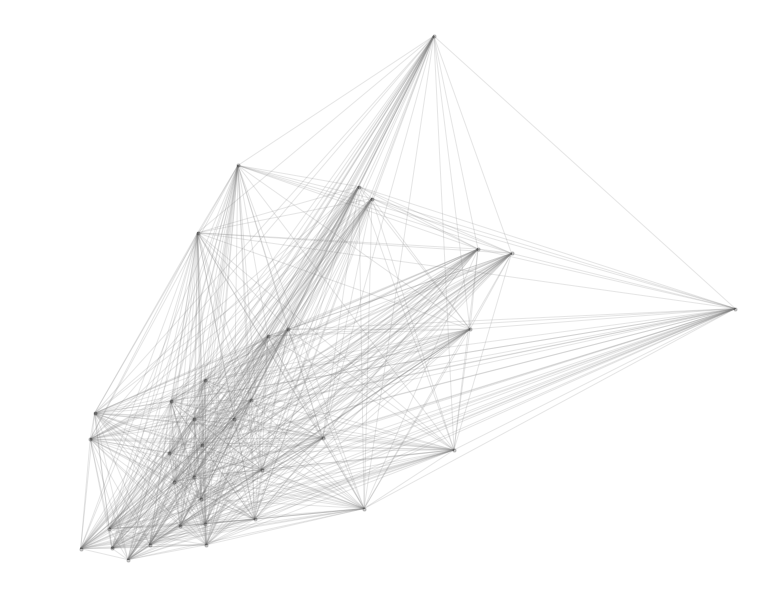

In [204]:
plt.figure(figsize=(10,8))
nx.draw(graph_complete_odd, pos=node_positions, edge_color="grey", node_size=10, node_color="black", alpha=0.2)

<h4> Minimum Weight Matching Computation </h4>

<br>
<br>
<br>

In [205]:
odd_matching_edges = nx.algorithms.max_weight_matching(graph_complete_odd, True)

print('Number of edges in matching: {}'.format(len(odd_matching_edges)))

Number of edges in matching: 18


In [206]:
list(odd_matching_edges)

[('rh_end_tt_3', 'rh_end_tt_4'),
 ('v_end_west', 'b_v'),
 ('y_rh', 'rh_end_south'),
 ('nature_end_west', 'o_y_tt_end_west'),
 ('v_end_east', 'rs_end_north'),
 ('rd_end_north', 'rh_end_north'),
 ('o_w_1', 'o_rt'),
 ('rt_end_south', 'y_rt'),
 ('g_w', 'w_bw'),
 ('rc_end_south', 'y_gy1'),
 ('b_end_east', 'g_gy2'),
 ('o_tt', 'rh_end_tt_2'),
 ('rt_end_north', 'b_tt_3'),
 ('b_bv', 'v_bv'),
 ('b_bw', 'rh_end_tt_1'),
 ('rd_end_south', 'b_end_west'),
 ('g_gy1', 'rc_end_north'),
 ('rs_end_south', 'y_gy2')]

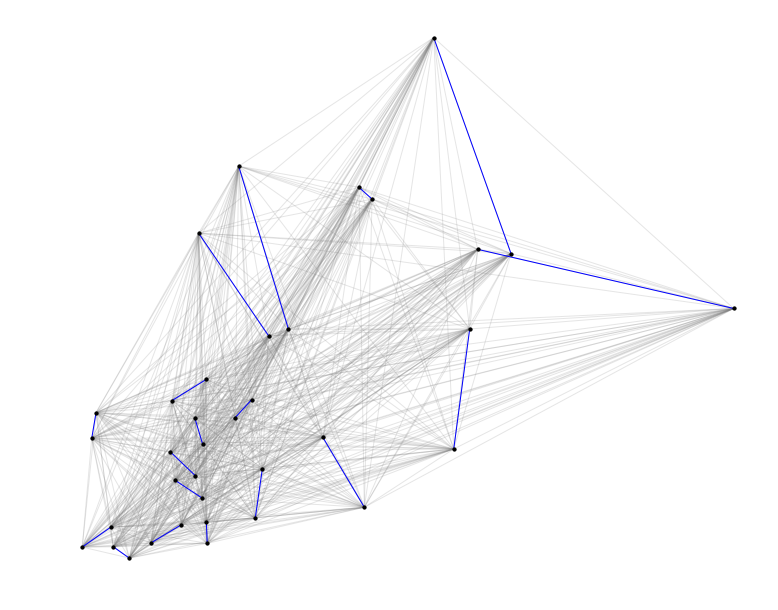

In [207]:
graph_odd_complete_min_distance_edges = nx.Graph(list(odd_matching_edges))

plt.figure(figsize=(10,8))
nx.draw(graph_complete_odd, pos=node_positions, edge_color="grey", node_size=10, node_color="black", alpha=0.2)
nx.draw(graph_odd_complete_min_distance_edges, pos=node_positions, edge_color="blue", node_size=10, node_color="black")

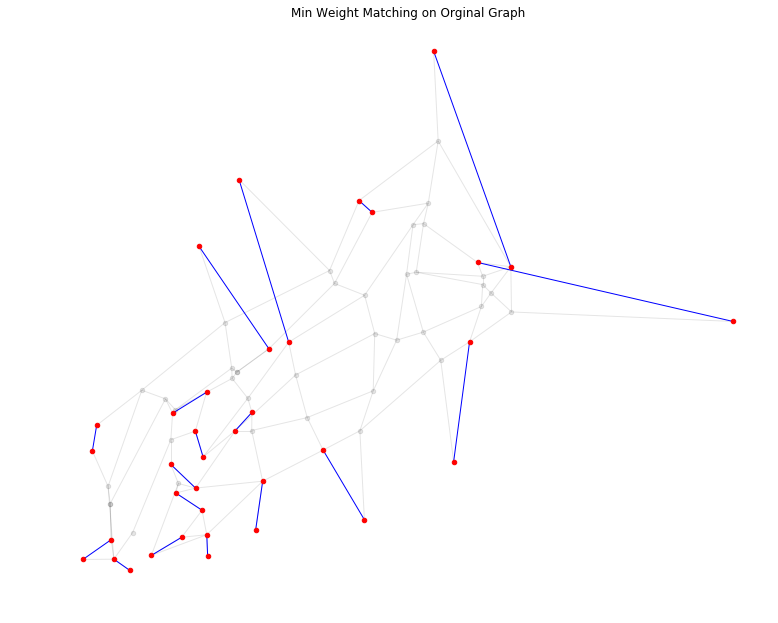

In [208]:
plt.figure(figsize=(10, 8))

# Plot the original trail map graph
nx.draw(graph, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(graph_odd_complete_min_distance_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

In [247]:
def create_new_graph(graph, edges, starting_node=None):
    g = nx.MultiGraph()
    
    for edge in edges:
        aug_path  = nx.shortest_path(graph, edge[0], edge[1], weight="distance")
        aug_path_pairs  = list(zip(aug_path[:-1],aug_path[1:]))
            
        for aug_edge in aug_path_pairs:
            aug_edge_attr = graph[aug_edge[0]][aug_edge[1]]
            g.add_edge(aug_edge[0], aug_edge[1], attr_dict=aug_edge_attr)
            
    for edge in graph.edges(data=True):
        g.add_edge(edge[0],edge[1],attr_dict=edge[2:])

    return g

In [248]:
multi_graph = create_new_graph(graph, odd_matching_edges)

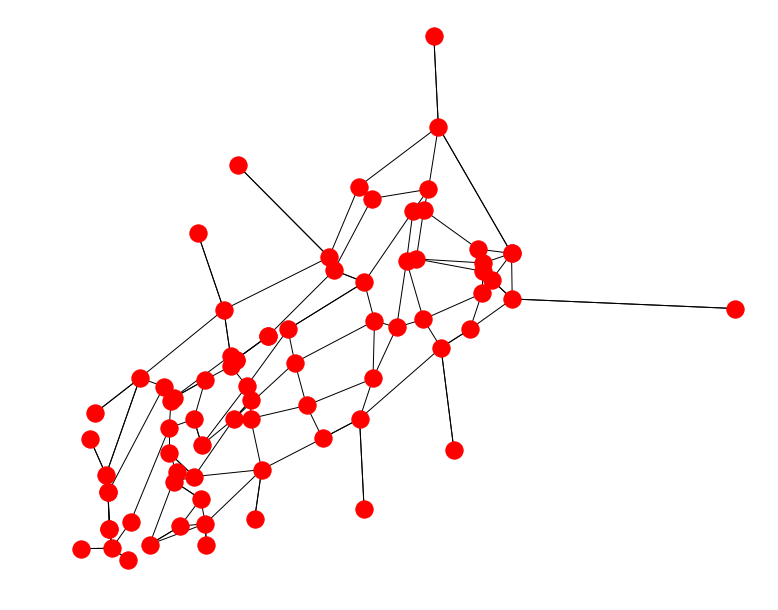

In [252]:
plt.figure(figsize=(10,8))
nx.draw(multi_graph, pos=node_positions)

In [259]:
def create_eulerian_circuit(graph, starting_node=None):
    return list(nx.eulerian_circuit(graph,source=starting_node))

In [260]:
euler_circuit = create_eulerian_circuit(multi_graph, "b_end_east")

In [261]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 158


In [262]:
euler_circuit


[('b_end_east', 'b_y'),
 ('b_y', 'park_east'),
 ('park_east', 'g_gy2'),
 ('g_gy2', 'b_g'),
 ('b_g', 'g_rs'),
 ('g_rs', 'b_rs'),
 ('b_rs', 'b_g'),
 ('b_g', 'b_w'),
 ('b_w', 'w_rs'),
 ('w_rs', 'o_rs'),
 ('o_rs', 'o_gy2'),
 ('o_gy2', 'b_gy2'),
 ('b_gy2', 'b_w'),
 ('b_w', 'w_gy2'),
 ('w_gy2', 'g_gy2'),
 ('g_gy2', 'w_gy2'),
 ('w_gy2', 'b_gy2'),
 ('b_gy2', 'w_gy2'),
 ('w_gy2', 'park_east'),
 ('park_east', 'b_o'),
 ('b_o', 'b_gy2'),
 ('b_gy2', 'b_o'),
 ('b_o', 'o_gy2'),
 ('o_gy2', 'y_gy2'),
 ('y_gy2', 'y_rs'),
 ('y_rs', 'rs_end_south'),
 ('rs_end_south', 'y_rs'),
 ('y_rs', 'o_rs'),
 ('o_rs', 'o_w_2'),
 ('o_w_2', 'o_rc'),
 ('o_rc', 'o_gy1'),
 ('o_gy1', 'w_gy1'),
 ('w_gy1', 'w_rc'),
 ('w_rc', 'o_rc'),
 ('o_rc', 'g_rc'),
 ('g_rc', 'b_rc'),
 ('b_rc', 'v_rc'),
 ('v_rc', 'rc_end_north'),
 ('rc_end_north', 'v_rc'),
 ('v_rc', 'b_rc'),
 ('b_rc', 'g_rc'),
 ('g_rc', 'g_rs'),
 ('g_rs', 'w_rs'),
 ('w_rs', 'o_w_2'),
 ('o_w_2', 'w_rc'),
 ('w_rc', 'y_rc'),
 ('y_rc', 'y_gy1'),
 ('y_gy1', 'w_gy1'),
 ('w_gy1', 